# Complex Networks Analysis

In this notebook I'd like to take a deep dive into complex networks. In particular, I'd like to study the structure of random networks as well as non-random networks that naturally arise in the real world, and then analyze their similarities and differences.

NOTE:  from here on out, I'll refer to a graph $G$ by $G = (V, E)$, where $V$ is the set of vertices and $E$ is the set of edges. Following standard conventions, I'll let $n = |V|$ and $m = |E|$.

## Getting Started

In [1]:
import numpy as np
import networkx as nx
import seaborn as sns
import matplotlib.pyplot as plt

First things first, let's take a look at a few different types of random graphs. Random graphs are nice to work with because they can be analyzed mathematically from first principles, and they provide a basis for comparison when analyzing real world networks.

The most famous model of a random graph is the $G(n, p)$ graph. In the $G(n, p)$ graph, we start with $n$ nodes and then draw an edge between each pair of nodes $i, j \in V$ with probability $p$, independent of all other edges.

Let's take a look at a few examples of $G(n, p)$ graphs.

In [2]:
def visualize_gnp(n, p):
    G = nx.gnp_random_graph(n, p)
    nx.draw(G)

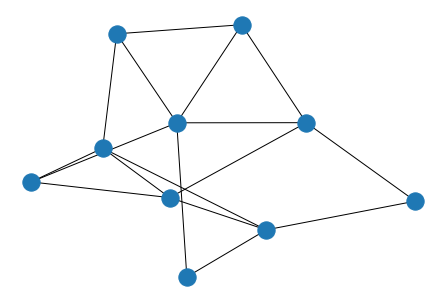

In [3]:
visualize_gnp(10, .25)

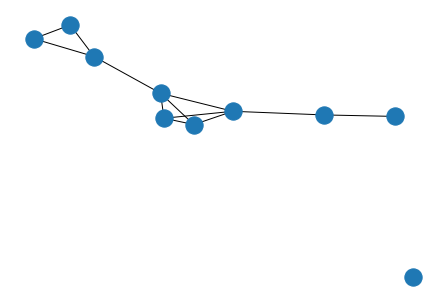

In [4]:
visualize_gnp(10, .4)

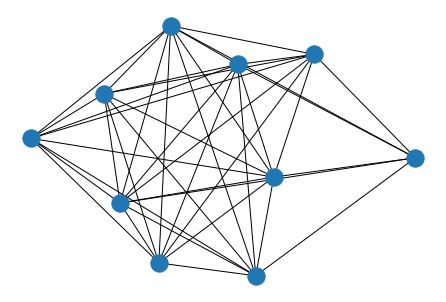

In [5]:
visualize_gnp(10, .85)

## Mean Statistics

When analyzing the structure of a complex network, a natural place first step is to take a look at the average number of connections in the network. In the case of the $G(n, p)$ graph, edges are drawn between each pair of vertices with probability $p$, so the probability mass function of the number of edges in the graph is given by

$$P(m) = {{n \choose 2} \choose m} p^m (1-p)^{ {n \choose 2} -m}$$

which is just the binomial distribution. The mean number of edges is therefore

$$\langle m \rangle = \sum_{m=0}^{{n \choose 2}} m P(m) = p {n \choose 2}.$$


In addition to the mean number of edges in the graph, we can also consider the mean degree $\langle k \rangle$ of vertices in the graph. Using the fact that the mean degree of vertex in a graph on $n$ nodes and $m$ edges is $\langle k \rangle = 2m/n$, the mean degree of a vertex in a $G(n, p)$ graph is

$$ \langle k \rangle = \sum_{m=0}^{{n \choose 2}} \frac{2m}{n} P(m) = \frac{2}{n}\langle m \rangle = (n-1)p.$$

Just to be consistent with standard conventions, we'll let $c = (n-1)p$ denote this mean degree.

## Degree Distribution

Here's where things get interesting. What about the degree distribution for each vertex in the graph? This distribution is given by

$$p_k = {n-1 \choose k} p^k (1-p)^{n-1-k},$$

which is again a binomial distribution. 

But we usually care about large graphs. In the asymptotic case where $n \rightarrow \infty$ we find that

$$\ln \left( (1-p)^{n-1-k} \right) = (n-1-k) \ln (1-p) = (n-1-k) \ln \left(1- \frac{c}{n-1}\right)$$

$$\sim -(n-1-k) \frac{c}{n-1} \sim -c,$$

using the fact that $\ln(1 - x) \approx -x$ for small $x$.

Using these asymptotic approximations, we find that $(1-p)^{n-1-k} \sim e^{-c}$. Similarly, for large $n$ we have that

$${n-1 \choose k} = \frac{(n-1)!}{(n-1-k)! k!} \sim \frac{(n-1)^k}{k!}.$$

Putting all of this together, we find that 

$$ p_k = {n-1 \choose k} p^k (1-p)^{n-1-k} \sim \frac{(n-1)^k}{k!} p^k e^{-c} = \frac{(n-1)^k}{k!} \left( \frac{c}{n-1} \right)^k e^{-c} = e^{-c} \frac{c^k}{k!}.$$

This implies that the asymptotic degree distribution of a vertex in the $G(n, p)$ model is a Poisson distribution, which is a pretty cool result.

In [6]:
from scipy import stats

In [7]:
def visualize_degree_dist(n, p):
    c = (n-1)*p
    xs = list(range(n))
    poisson_xs = [stats.poisson.pmf(x, c) for x in xs]
    binomial_xs = [stats.binom.pmf(x, n, p) for x in xs]
    plt.plot(xs, poisson_xs, label='Poisson')
    plt.plot(xs, binomial_xs, label='Binomial')
    plt.title("Vertex Degree Distribution (Binomial vs. Poisson)")
    plt.xlabel("Degree")
    plt.ylabel("Probability")
    plt.legend()
    plt.show()

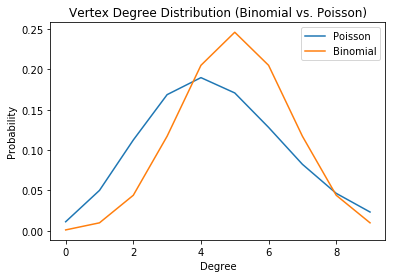

In [8]:
visualize_degree_dist(10, .50)

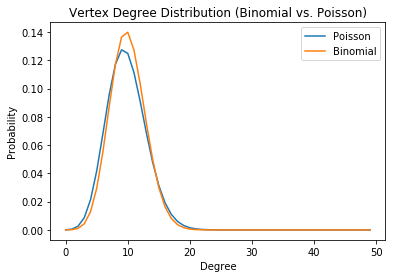

In [9]:
visualize_degree_dist(50, .20)

We see that the Poisson approximation to the binomial distribution becomes better as we increase the number of vertices in the network and decrease the probability of a connection.

## Network Components

Thus far we've analyzed properties of the edge set of a random graph, particularly the distribution of edges. On average, a $G(n, p)$ graph contains $p {n \choose 2}$ total edges, and the (asymptotic) degree distribution of each vertex is Poisson$(c)$, where $c = (n-1)p$ is the average degree of a vertex.

Another interesting aspect of a network is its *connected components*. A connected component is simply a subset $S \subseteq V$ of the vertex set in which there exists a path between any two nodes $i, j \in S$. For example, in a $G(n, p)$ graph with $p=0$ there are no edges present in the graph, so each vertex belongs to its own connected component. At the other extreme, in a $G(n, p)$ graph with $p=1$, all ${n \choose 2}$ possible edges are present in the graph, so there exists one connected component, the graph itself.

Here are the two extreme cases with $n=10$:

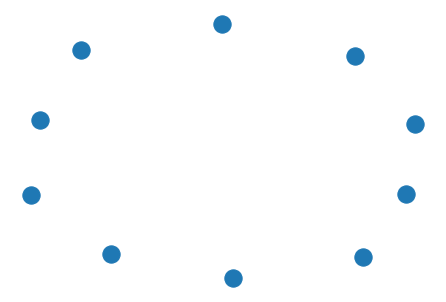

In [13]:
visualize_gnp(10, 0)

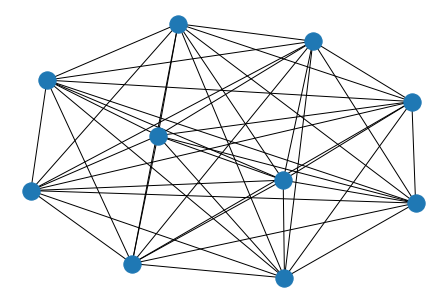

In [14]:
visualize_gnp(10, 1)

But what about graphs that lie somewhere between these two extremes? In those graphs there are usually multiple connected components, and we can study the various sizes of these components.